# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')# the last two lines have to be added for spark.read.csv to run
spark = SparkSession(sc)

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [4]:
df = spark.read.csv('../data/event_ds_2.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [5]:
df.show(20)

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|167717397|    D| 9950164|2017-03-30|
|167875890|    D|10358654|2017-03-30|
|168055890|    D|13881959|2017-03-30|
|167588029|    D|  382012|2017-03-30|
|168008812|    D| 6651913|2017-03-30|
|168013256|    D|23490236|2017-03-30|
|167995896|    D| 6532713|2017-03-30|
|167717397|    D| 4288766|2017-03-30|
|168055890|    D|19395609|2017-03-30|
|168008812|    D|  703766|2017-03-30|
|167717397|    D| 9559531|2017-03-30|
|168008812|    D|  625294|2017-03-30|
|168008812|    D| 4860986|2017-03-30|
|167750418|    D|  110668|2017-03-30|
|168055890|    D| 5180783|2017-03-30|
|167705545|    D|22645228|2017-03-30|
|167774319|    D| 6178631|2017-03-30|
|168008812|    D| 1244660|2017-03-30|
|168055890|    D|20865000|2017-03-30|
|167963399|    D|23250904|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [6]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|167717397|    D| 9950164|2017-03-30|
|167875890|    D|10358654|2017-03-30|
|168055890|    D|13881959|2017-03-30|
|167588029|    D|  382012|2017-03-30|
|168008812|    D| 6651913|2017-03-30|
|168013256|    D|23490236|2017-03-30|
|167995896|    D| 6532713|2017-03-30|
|167717397|    D| 4288766|2017-03-30|
|168055890|    D|19395609|2017-03-30|
|168008812|    D|  703766|2017-03-30|
|167717397|    D| 9559531|2017-03-30|
|168008812|    D|  625294|2017-03-30|
|168008812|    D| 4860986|2017-03-30|
|167750418|    D|  110668|2017-03-30|
|168055890|    D| 5180783|2017-03-30|
|167705545|    D|22645228|2017-03-30|
|167774319|    D| 6178631|2017-03-30|
|168008812|    D| 1244660|2017-03-30|
|168055890|    D|20865000|2017-03-30|
|167963399|    D|23250904|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [8]:
# simple count rows
df.count()

12323238

In [9]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59637

In [10]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  634068|
|    S|  772539|
|    P|10916631|
+-----+--------+



In [11]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  634068|99556827|
|    S|  772539|99180749|
|    P|10916631|99899327|
+-----+--------+--------+



In [12]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 31130|
|2017-04-01|    P|490251|
|2017-04-01|    S| 32365|
|2017-04-02|    D| 22611|
|2017-04-02|    P|446652|
|2017-04-02|    S| 30251|
|2017-04-03|    D| 20908|
|2017-04-03|    P|253151|
|2017-04-03|    S| 26104|
|2017-04-04|    D| 19901|
|2017-04-04|    P|376161|
|2017-04-04|    S| 25732|
|2017-04-05|    D| 17974|
|2017-04-05|    P|302442|
|2017-04-05|    S| 19959|
+----------+-----+------+



In [32]:
date_count = df.groupBy('date').count().toPandas()


In [10]:
date_count.head(10)

,date,count
0,2017-05-11,186511
1,2017-04-30,225477
2,2017-04-19,244385
3,2017-05-04,196782
4,2017-05-05,195307
5,2017-04-16,279748
6,2017-04-07,334997
7,2017-05-10,185196
8,2017-04-09,323407
9,2017-05-08,191157


In [12]:
date_count=date_count.sort_values(by=['date'])

In [13]:
date_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 37 to 27
Data columns (total 2 columns):
date     44 non-null object
count    44 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [21]:
date_count.head(20)

,date,count
37,2017-03-30,722385
41,2017-03-31,729913
38,2017-04-01,553746
35,2017-04-02,499514
42,2017-04-03,300163
12,2017-04-04,421794
39,2017-04-05,340375
17,2017-04-06,337385
6,2017-04-07,334997
20,2017-04-08,335818


In [16]:
date_count['date'][43]### the last date

'2017-05-07'

<Figure size 432x288 with 0 Axes>

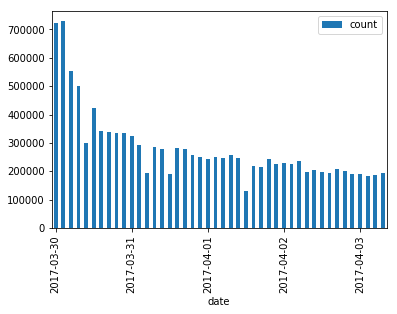

In [31]:
plt.figure()
date_count.plot.bar(x='date',fontsize=10)
plt.xticks(range(0,len(date_count))[::10])
display()

# Label definition

In [37]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [38]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [39]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [40]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36170|
|    0|22149|
+-----+-----+



# Feature generation

In [41]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1 to generate frequency features

In [42]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [43]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [44]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167587246|            7|
|167789926|            1|
|168315218|            2|
|168227697|            5|
|168208406|            1|
+---------+-------------+
only showing top 5 rows



In [45]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [46]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2 to generate frequency features 

In [47]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [48]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167587246|            6|            7|           21|            37|            75|
|167970837|            0|            0|            0|             3|            16|
|168028443|            2|            5|           13|            13|            17|
|167806314|            0|            1|            6|             8|            32|
|167894185|            0|            0|            4|             4|             5|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [49]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [50]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [51]:
# defined as days from last event
# can generate one feature for each type of event
def recency_feature_generation(df,event,snapshot_date):
    
    df_recency=df.filter(F.col('event')== event)\
    .filter((F.col('date') <= cutoff_date))\
    .groupBy('uid').agg(F.min(F.datediff(F.lit(cutoff_date),F.col('date'))).alias('days_from_last_'+event))
    return df_recency

In [52]:
event_ls=['P','D','S']
snapshot_date = feature_window_end_date
df_recency=[]
for element in event_ls:
    df_recency.append(recency_feature_generation(df_feature_window,element,snapshot_date))

In [55]:
df_recency

[DataFrame[uid: string, days_from_last_P: int],
 DataFrame[uid: string, days_from_last_D: int],
 DataFrame[uid: string, days_from_last_S: int]]

In [56]:
df_recency[0].groupBy('days_from_last_P').count().orderBy('days_from_last_P').show()

+----------------+-----+
|days_from_last_P|count|
+----------------+-----+
|               9| 8347|
|              10| 3450|
|              11| 2336|
|              12| 1773|
|              13|  933|
|              14| 1755|
|              15| 1412|
|              16| 1159|
|              17| 1034|
|              18| 1025|
|              19|  912|
|              20| 1078|
|              21| 1050|
|              22|  982|
|              23|  709|
|              24|  947|
|              25|  798|
|              26|  549|
|              27|  929|
|              28|  993|
+----------------+-----+
only showing top 20 rows



### Profile features

In [58]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168540348|    ar|   77260|2017-03-30|    64528|          0|
|168551323|    ar|16889394|2017-03-30|       93|         93|
|168548223|    ar|  908636|2017-03-30|        1|        179|
|168550237|    ar| 6511070|2017-03-30|      144|        237|
|168519439|    ar|       0|2017-03-30|      227|        228|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [59]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [60]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    1|
|    ar|50840|
|    ip| 7357|
+------+-----+



In [61]:
# check if one user has two devices
df_profile_tmp.count()

58198

In [32]:
df_profile_tmp.distinct().count()

58198

In [62]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7357|
|          2|50841|
+-----------+-----+



In [63]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  134|
|          1| 7357|
|          2|50841|
+-----------+-----+



### Total play time features

In [64]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)
from pyspark.sql.types import IntegerType
df_play_feature_window=df_play.filter((F.col('date')>= feature_window_start_date)&(F.col('date')<= feature_window_end_date))
df_tot_play_time=[]
for time in time_window_list:
    tot_play_fea=df_play_feature_window.select('uid','play_time')\
    .filter((F.col('play_time').cast(IntegerType())>= 0)\
           &(F.col('date') >= snapshot_date - datetime.timedelta(time_window-1))&(F.col('date')<= snapshot_date))\
    .groupBy('uid').agg(F.sum(F.col('play_time').cast(IntegerType())).alias('play_time_last_'+str(time)))
    df_tot_play_time.append(tot_play_fea)

In [65]:
df_tot_play_time

[DataFrame[uid: string, play_time_last_1: bigint],
 DataFrame[uid: string, play_time_last_3: bigint],
 DataFrame[uid: string, play_time_last_7: bigint],
 DataFrame[uid: string, play_time_last_14: bigint],
 DataFrame[uid: string, play_time_last_30: bigint]]

In [66]:
df_tot_play_time[0].show(5)

+---------+----------------+
|      uid|play_time_last_1|
+---------+----------------+
|168553975|        32582232|
|168574808|             437|
|168580671|           78149|
|168580535|             231|
|168609171|           20959|
+---------+----------------+
only showing top 5 rows



### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [67]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [68]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [69]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [71]:
# join all the recency features
df_model_final=join_feature_data(df_model_final,df_recency)

In [72]:
# join all the total play features
df_model_final=join_feature_data(df_model_final,df_tot_play_time)

In [39]:
df_model_final.show(5)

+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+
|      uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|device_type|
+---------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+
|132952490|    0|            0|            0|            0|           121|           263|            0|            0|            0|             0|            11|            0|            0|            0|             2|            10|          2|
|141858867|    1

In [73]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final_2.csv',index=False)